In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'항일+민족', '국제주의+세계적', '비폭력(비무장)+평화', '공화정 국가 수립 + 개혁적', '폭력(무장)'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['항일+민족', '국제주의+세계적', '비폭력(비무장)+평화', '공화정 국가 수립 + 개혁적', '폭력(무장)']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

항일+민족
['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG', '자유/NNG', '일본인/NNG', '평화/NNG', '하늘/NNG', '정부/NNG', '마음/NNG', '조선인/NNG', '행동/NNG', '국민/NNG', '생각/NNG', '한국/NNP', '정의/NNG', '때/NNG', '가운데/NNG', '만세/IC', '피/NNG', '회의/NNG', '아래/NNG', '역사/NNG', '백성/NNG', '동안/NNG', '자신/NNG', '정신/NNG', '운동/NNG', '앞/NNG', '소리/NNG', '미국/NNP', '나/NP', '원수/NNG', '대표/NNG', '시대/NNG', '이번/NNG', '과거/NNG', '생명/NNG', '이상/NNG', '세상/NNG', '전쟁/NNG', '동양/NNG', '선언/NNG', '후/IC', '힘/NNG', '뜻/NNG', '속/NNG', '형제/NNG', '사실/MAG', '강화/NNG', '곳/NNG', '문제/NNG', '요구/NNG', '중국/NNP', '왜놈/NNG', '교육/NNG', '정치/NNG', '기회/NNG', '시작/NNG', '적/NNG', '단체/NNG', '신문/NNG', '오늘/NNG', '인도/NNP', '파리/NNP', '도리/NNG', '단/MAJ', '귀국/NNG', '조약/NNG', '사이/NNG', '목적/NNG', '황제/NNG', '임시/NNG', '인류/NNG', '건국/NNG', '노예/NNG', '기관/NNG', '학생/NNG', '몸/NNG', '조직/NNG', '안/MAG', '필요/NNG', '위원/NNG', '대한민국/NNP', '관계/NNG', '병합/NNG', '이후/NNG', '고통/NNG', '손/NNG', '러시아/NNP', '국가/NNG', '문명/NNG', '학교/NNG', '인민/NNG', '독립운동/

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/전자사료관.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

민족 대표 인이 미국 대통령에게 보낸 글
엄숙한 신념과 숭고한 기개를 가지고 정의와 보편적 행복 및 항구적 평화를 기초로 하는 신세계를 건설하기 위해 분주하게 애쓰고 계시는 시대의 위대한 리더이신 윌슨 각하 우리는 가장 진지한 경의와 깊고 두터운 축복을 각하께 바치고자 합니다
각하의 정의감에 감격하고 각하의 업적을 칭송하는 세계의 뭇 대중들 가운데서도 가장 큰 정성을 가지고 있는 사람은 바로 우리 조선인이라는 사실을 기억해 주십시오 이천만의 순수한 마음과 천만 개의 우러러보는 눈이 모두 각하의 주위를 향하고 있다는 사실을 늘 생각해 주십시오
전체 인류의 완전한 행복을 실현한 신세계가 이루어지려면 무엇보다도 먼저 완전하고 투철한 민족 자결주의가 실제적으로 승리해야 합니다 그렇지 않다면 어떠한 뛰어난 책략도 그야말로 모래 위에 지은 누각에 지나지 않을 것입니다 이것은 현명하신 각하께서 부르짖으신 것이며 세계적으로도 이미 승인을 받았습니다
그럼에도 불구하고 현재 정실이나 인습 혹은 국제적 고식으로 말미암아 명쾌한 결과가 나오는 것이 지체되고 있는 것이 아니냐는 걱정이 없지 않습니다 많은 사람이 이것을 초조하게 여기고 있습니다 우리가 한층 더 마음을 놓을 수 없는 것은 각하께서 유럽의 정국과 직접 연결되지 않은 문제에 대해서는 다소 주의를 덜 기울이고 계시는 것은 아닌가 생각되기 때문입니다 물론 이것은 하나의 기우에 지나지 않을 것입니다 하지만 각하께서 이러한 점에 조금만 더 마음을 쓰시고 노력해 주시기 바랍니다
각하 지금 열리고 있는 강화회의의 중요한 목적은 각하께서도 누누이 밝히신 바와 같이 유럽의 전란을 수습하기 위한 것만이 아닙니다 인류 전체가 아무 쓸모가 없는 참화에 다시는 휘말리지 않도록 하기 위해서 그 원인이 되는 일체의 불합리한 상태를 완전히 제거하는 세계적인 대개조를 이룩하는 데 그 목적이 있습니다
각하께서 아메리카의 대통령으로서 귀중한 인명을 희생하고 막대한 재물을 소비하신 것은 바로 이러한 고귀한 이상을 실현하기 위해서 그랬던 것이 아닙니까 각하의

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_44288\3258696453.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['민족/NNG', '대표/NNG', '미국/NNP', '대통령/NNG', '글/NNG', '신념/NNG', '기개/NNG', '정의/NNG', '보편/NNG', '행복/NNG', '항구/NNG', '평화/NNG', '기초/NNG', '세계/NNG', '건설/NNG', '분주/NNG', '시대/NNG', '리더/NNG', '윌슨/NNP', '각하/NNG']
['민족/NNG', '대표/NNG', '이/VCP', 'ᆫ/ETM', '이/MM', '미국/NNP', '대통령/NNG', '에게/JKB', '보내/VV', 'ᆫ/ETM', '글/NNG', '엄숙/XR', '하/XSA', 'ᆫ/ETM', '신념/NNG', '과/JC', '숭고/XR', '하/XSA', 'ᆫ/ETM', '기개/NNG']
{'가르침/NNG', '동아시아/NNP', '기/ETN', '기회/NNG', '나아가/VV', '며/EC', '끝/NNG', '게/EC', '위대/XR', '유일/NNG', '자랑/NNG', '민중/NNG', '인류/NNG', '방법/NNG', '구출/NNG', '종/NNG', '주위/NNG', '한꺼번에/MAG', '붕/NNG', '탄복/NNG', '어떠/XR', '이것/NP', '첫/MM', '한일의정서/NNP', '가/JKS', '과시/NNG', '무너지/VV', '함께/MAG', '어린아이/NNG', '인도/NNP', '천/NR', '화/XSN', '오천/NR', '심지어/MAG', '처음/NNG', '누리/VV', '주권/NNG', '마침내/MAG', '마수/NNG', '막론/XR', '신음/NNG', '사라지/VV', '내/VV', '오니/EC', '지금/MAG', '제거/NNG', '인도/NNG', '키우/VV', '파기/NNG', '시키/XSV', '속이/VV', '윌슨/NNP', '서양/NNG', '고상/XR', '영구히/MAG', '만/NNB', '계속/NNG', '로/JKB', '생명력/NNG', '한국/NNP', 'ᆫ/ETM', '투철/XR', '완전히/MA

<Axes: xlabel='n', ylabel='word'>

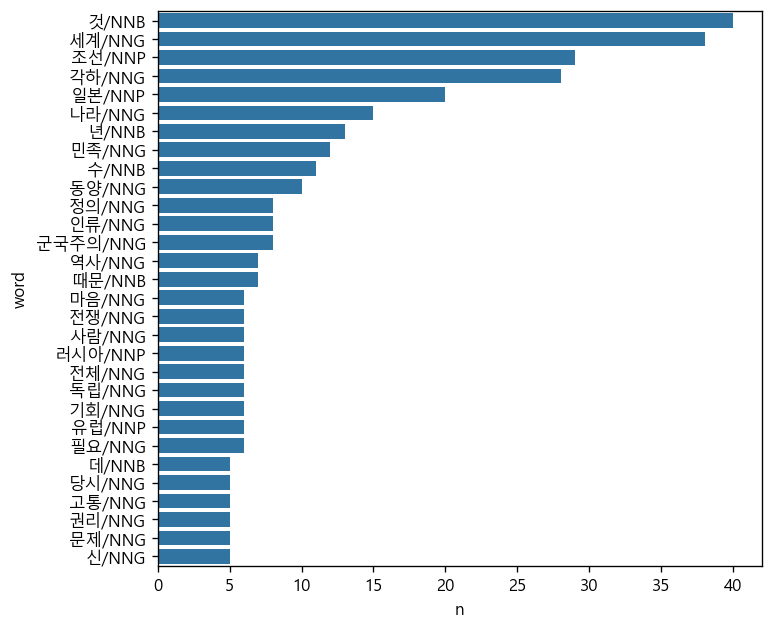

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

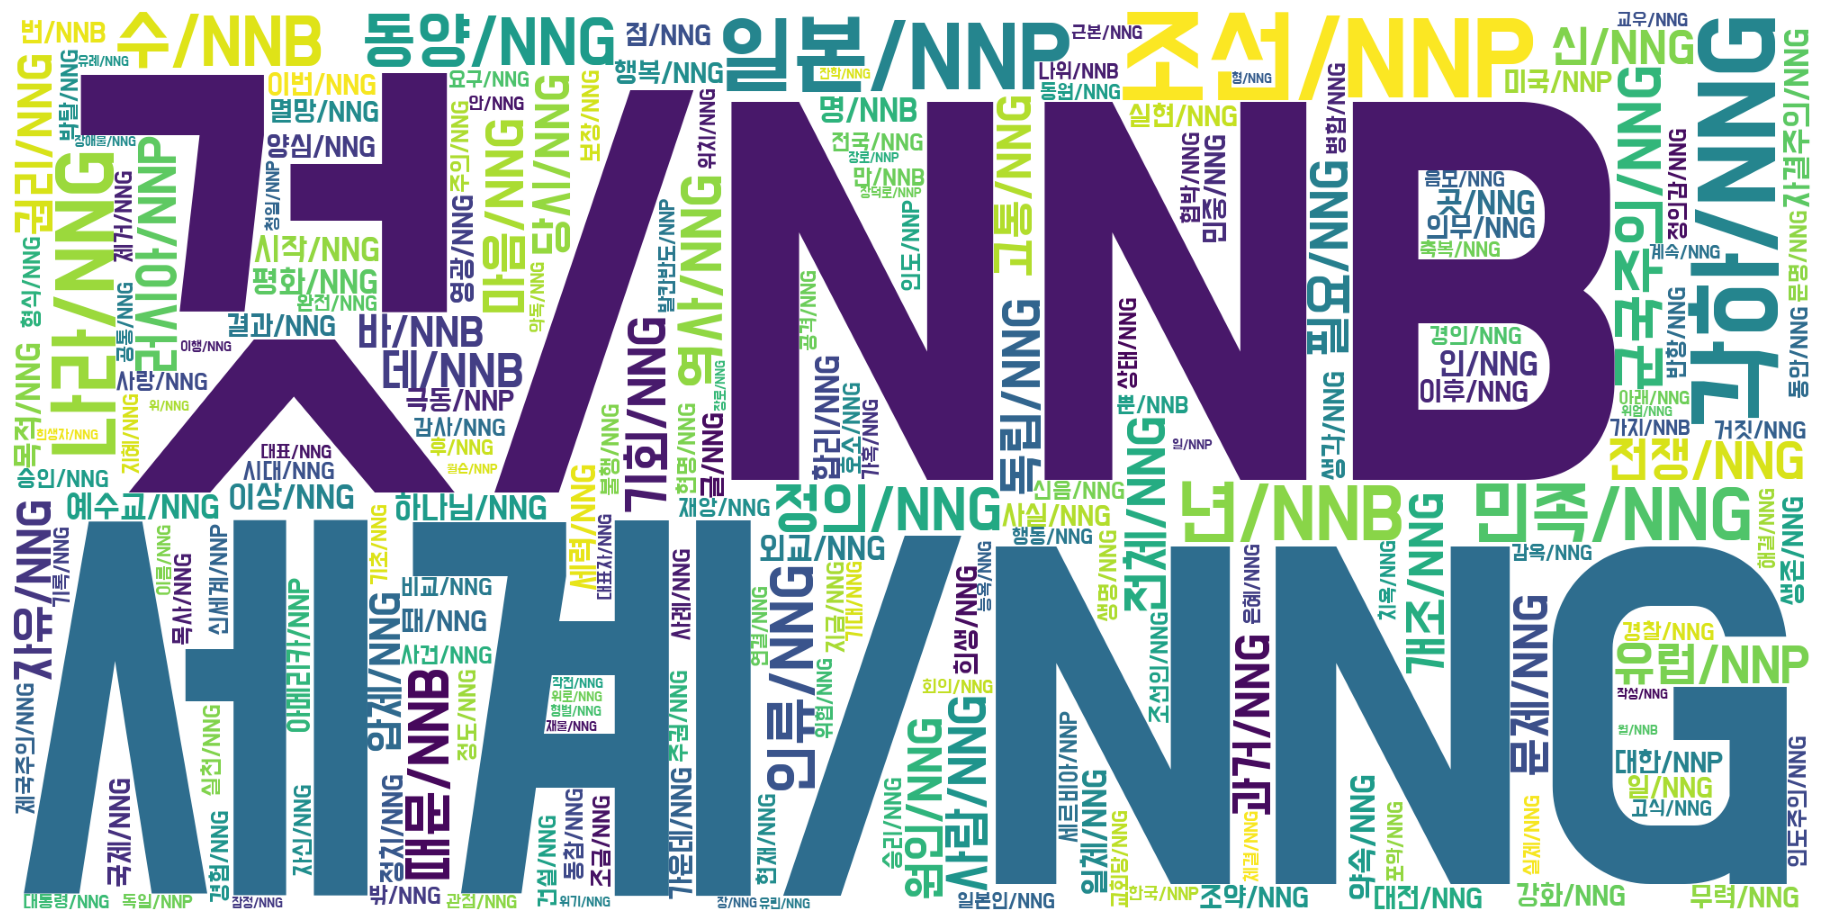

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...   90  \
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                  91   92   93   94   95   96   97   98   99  
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 100 columns]
                   0     1     2    3    4    5    6    7    8    9  ...   90  \
항일+민족            5.0  11.0  19.0  9.0  2.0

C:\Users\wjh20\AppData\Local\Temp\ipykernel_44288\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_44288\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
항일+민족            0.050252  0.110554  0.190956  0.090453  0.020101  0.040201   
국제주의+세계적         0.000000  1.386294  1.386294  0.000000  2.079442  0.000000   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
공화정 국가 수립 + 개혁적  2.207275  0.000000  0.000000  0.000000  0.000000  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                        6        7         8         9  ...        90  \
항일+민족            0.040201  0.01005  0.080403  0.010050  ...  0.090453   
국제주의+세계적         0.693147  0.00000  0.693147  0.693147  ...  0.000000   
비폭력(비무장)+평화      0.000000  0.00000  0.000000  0.000000  ...  0.000000   
공화정 국가 수립 + 개혁적  0.000000  0.00000  0.000000  2.207275  ...  0.000000   
폭력(무장)           0.000000  0.00000  0.000000  0.000000  ...  0.000000   

                       91        92        93        94        95        96  \
항일+민족  

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/전자사료관.csv")

C:\Users\wjh20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


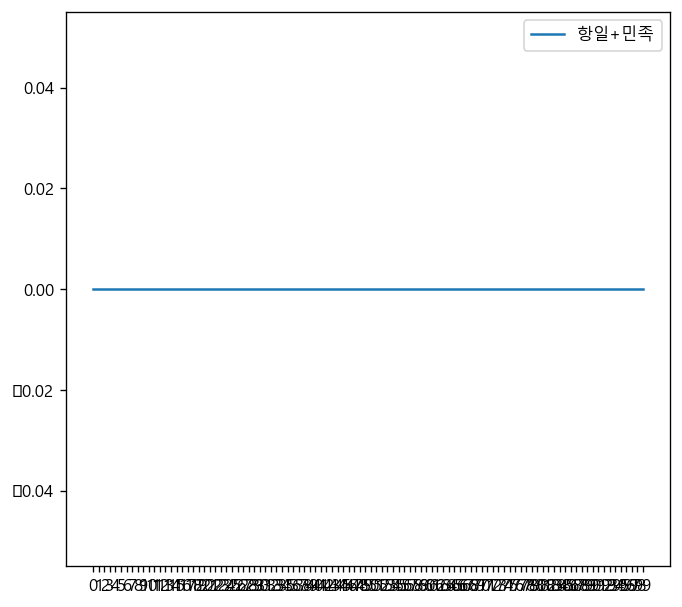

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

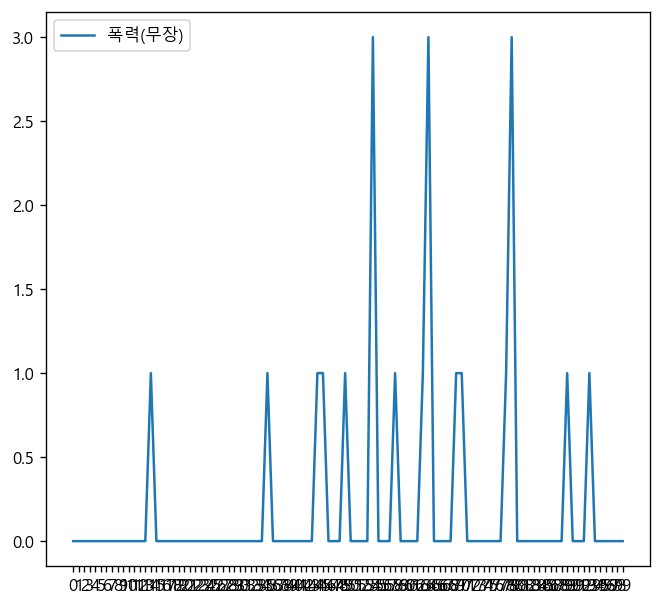

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

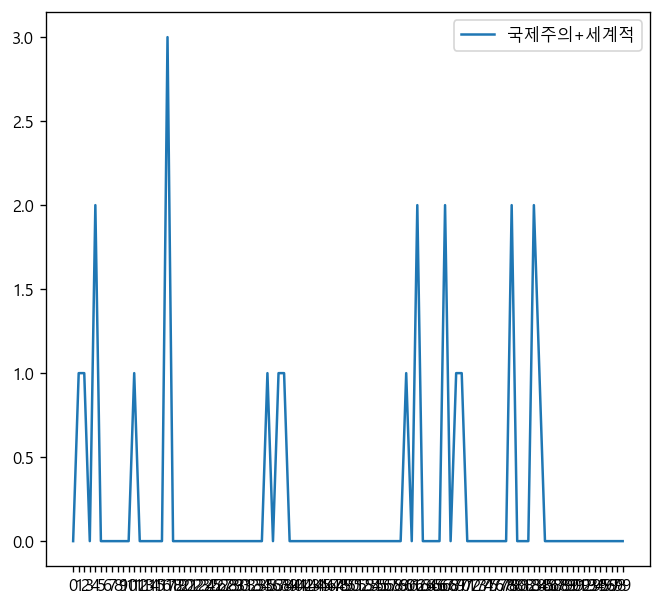

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

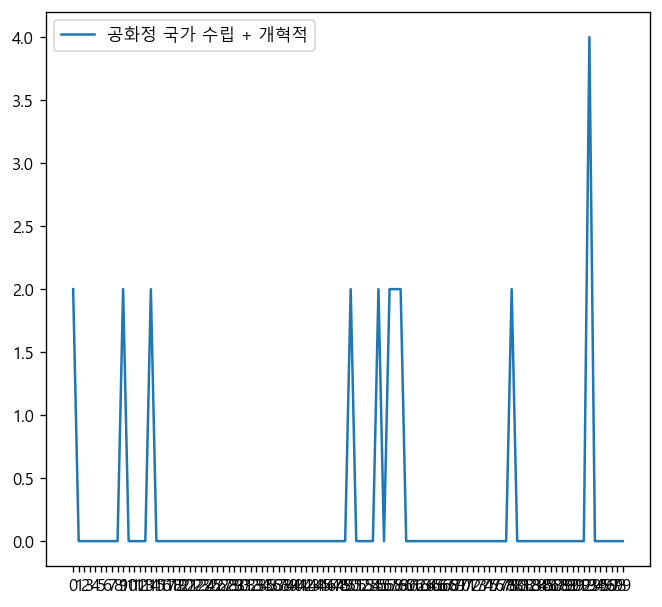

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

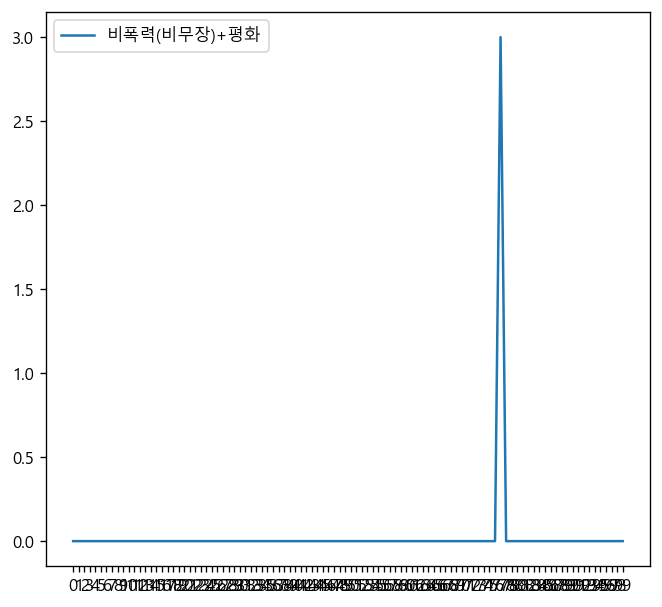

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

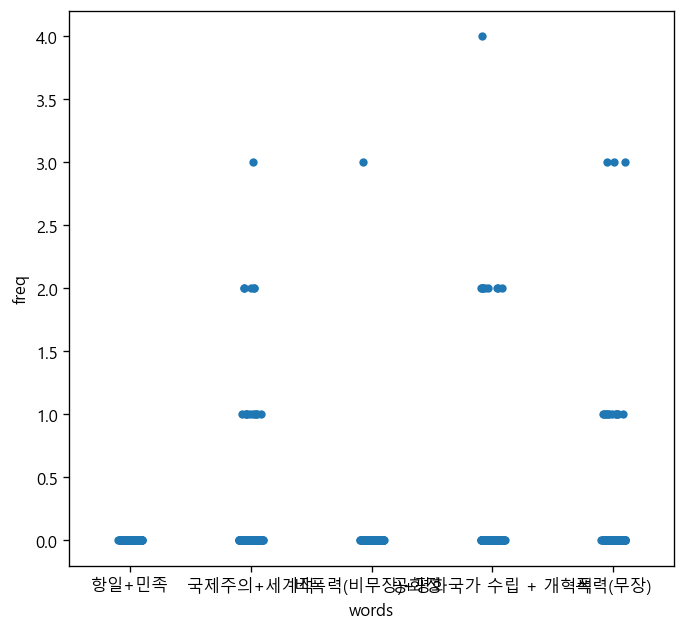

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

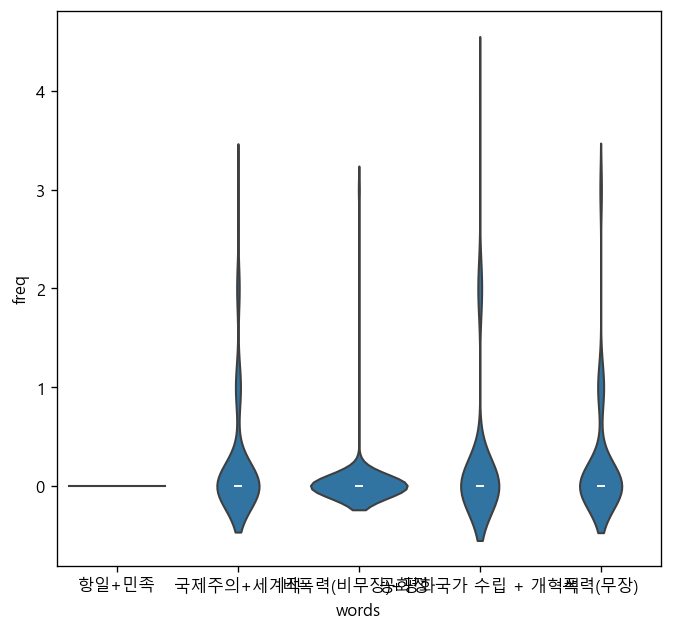

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

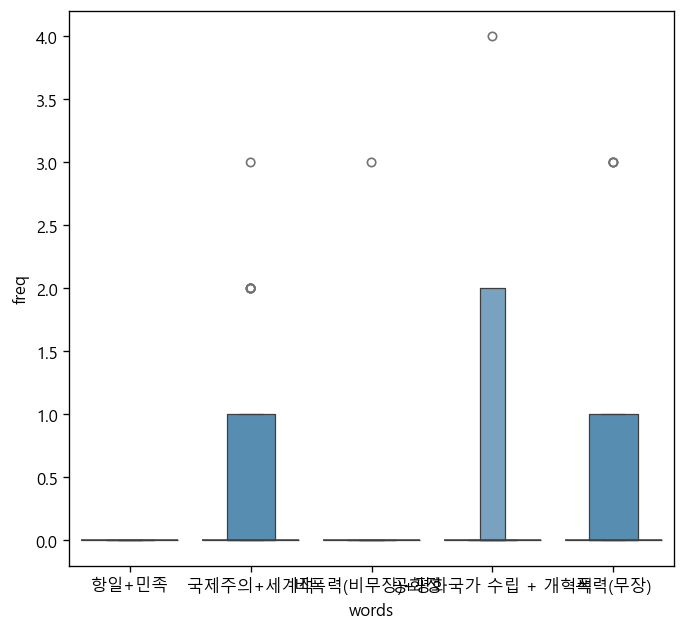

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)